# Imports

In [1]:
import sys
sys.path.append('../src/')

import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  

from sklearn.metrics import pairwise_distances
from sklearn.cluster import Birch

from DataSetFactory import DataSetFactory
from ClusterPlot import ClusterPlot

In [2]:
RANDOM_STATE = 42

In [3]:
ds = DataSetFactory.get_dataset('hourglass2', random_state=RANDOM_STATE, sample=None, is_subset=False)

In [4]:
ds.feature_cols

['X', 'Y', 'Z']

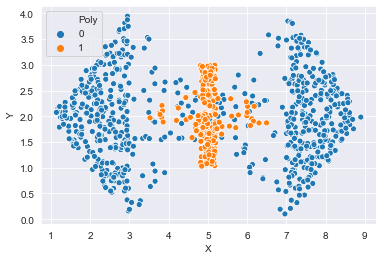

In [5]:
sns.scatterplot(x='X', y='Y', data=ds.df, hue=ds.label_col)

# 3D Plot For Paper

In [6]:
ds.df[ds.label_col].unique()

array([0, 1], dtype=int64)

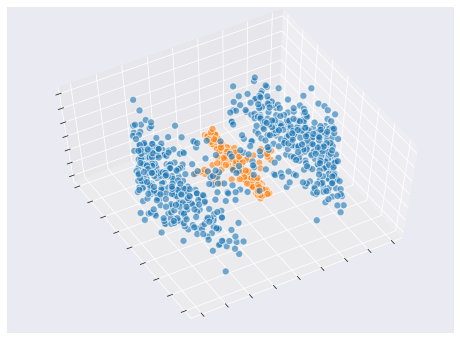

In [7]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = ds.df[ds.df[ds.label_col] == 0]['X']
ys = ds.df[ds.df[ds.label_col] == 0]['Y']
zs = ds.df[ds.df[ds.label_col] == 0]['Z']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

xs = ds.df[ds.df[ds.label_col] == 1]['X']
ys = ds.df[ds.df[ds.label_col] == 1]['Y']
zs = ds.df[ds.df[ds.label_col] == 1]['Z']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('z')

# remove ticks
ax = plt.gca()
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

for line in ax.xaxis.get_ticklines():
    line.set_visible(False)
for line in ax.yaxis.get_ticklines():
    line.set_visible(False)
for line in ax.zaxis.get_ticklines():
    line.set_visible(False)

ax.view_init(elev=60, azim=60)

plt.show()

In [6]:
X = ds.df[ds.feature_cols].values
y = ds.df[ds.label_col].values

In [7]:
dist_mat = pairwise_distances(X)
threshold_candidates = np.unique(dist_mat)
threshold_candidates.shape

(539388,)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027BAAC45E08>]],
      dtype=object)

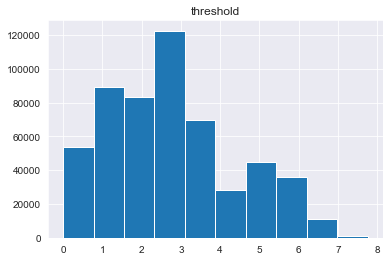

In [8]:
# for the sake of the experiment let's evaluate all of them
thresholds_df = pd.DataFrame(threshold_candidates, columns=['threshold'])
thresholds_df['num_clusters'] = np.nan
thresholds_df['num_points'] = ds.df.shape[0]
thresholds_df.hist(['threshold'])

In [9]:
# Filter only thresholds smaller than 1.5
thresholds_df_sample = thresholds_df[thresholds_df['threshold']<=2]
thresholds_df_sample = thresholds_df_sample.sample(n=200, random_state=RANDOM_STATE)
# thresholds_df_sample = thresholds_df.sample(n=200, random_state=RANDOM_STATE)

In [10]:
def get_num_clusters_birch(ds, threshold):
    num_clusters = 0
    for label in ds.df[ds.label_col].unique():
        label_data = ds.df[ds.df[ds.label_col]==label][ds.feature_cols].values
        birch = Birch(threshold=threshold, branching_factor=2, n_clusters=None)
        birch.fit(label_data)
        num_clusters += birch.subcluster_centers_.shape[0]
    return num_clusters

thresholds_df_sample['num_clusters'] = thresholds_df_sample['threshold'].transform(lambda t: get_num_clusters_birch(ds, t))
thresholds_df_sample['compression'] = thresholds_df_sample['num_points'] / thresholds_df_sample['num_clusters']

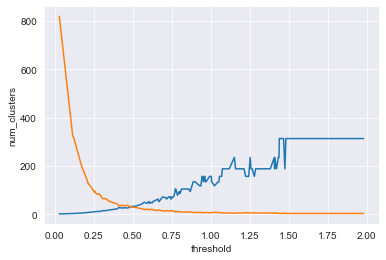

In [11]:
sns.lineplot(x='threshold', y='compression', data=thresholds_df_sample)
sns.lineplot(x='threshold', y='num_clusters', data=thresholds_df_sample)

# Unsupervised UMAP

In [10]:
umap_cp = ClusterPlot(dim_reduction_algo='umap',
            reduce_all_points=True,
            n_iter=1, 
            batch_size=0,
            learning_rate=0.1,
            do_animation=False,
            dataset='Hourglass2',
            class_to_label=ds.class_to_label,
            show_fig=True,
            save_fig=True,
            random_state=RANDOM_STATE,
            show_anchors=False,
            supervised=False,
            show_points=True,
            show_inner_blobs=False,
            show_blobs=False,
            show_label_level_plots=True,
            show_anchor_level_plot=False,
            annotate_images=False,
            birch_threshold=0.55)
print(umap_cp)

AMAP
addr:@a23b08
verbose=True
n_components=2
anchors_method='birch'
n_intra_anchors=None
birch_threshold=0.55
birch_branching_factor=None
dim_reduction_algo='umap'
supervised=False
umap_n_neighbors=15
umap_min_dist=1
reduce_all_points=True
uniform_points_per='anchor'
k=20
proximity_k=3
self_relation=False
radius_q=None
do_relaxation=True
top_greedy=1
magnitude_step=False
n_iter=1
batch_size=0
stop_criteria=1e-05
loss_func=<function AMAP.l_inf_loss at 0x000001736FE06DC8>
loss='Linf'
only_inter_relations=False
learning_rate=0.1
mask_sparse_subcluster=None
random_points_method='voronoi'
class_to_label={0: 'Poly0', 1: 'Poly1'}
random_state=42
n_jobs=None
dataset='Hourglass2'
show_fig=True
save_fig=True
is_plotly=False
do_animation=False
use_spline=False
alpha=None
remove_outliers_k=None
douglas_peucker_tolerance=0.6
smooth_iter=3
skip_polygons_with_area=0.01
mask_relation_in_same_label=True
save_fig_every=1
show_points=True
show_anchors=False
show_polygons=False
show_inner_blobs=False
sho

finding intra class anchors using birch
UnSupervised Dim Reduction
Dim Reduction all points
Starting iteration 1 loss = 0.22264337508239948


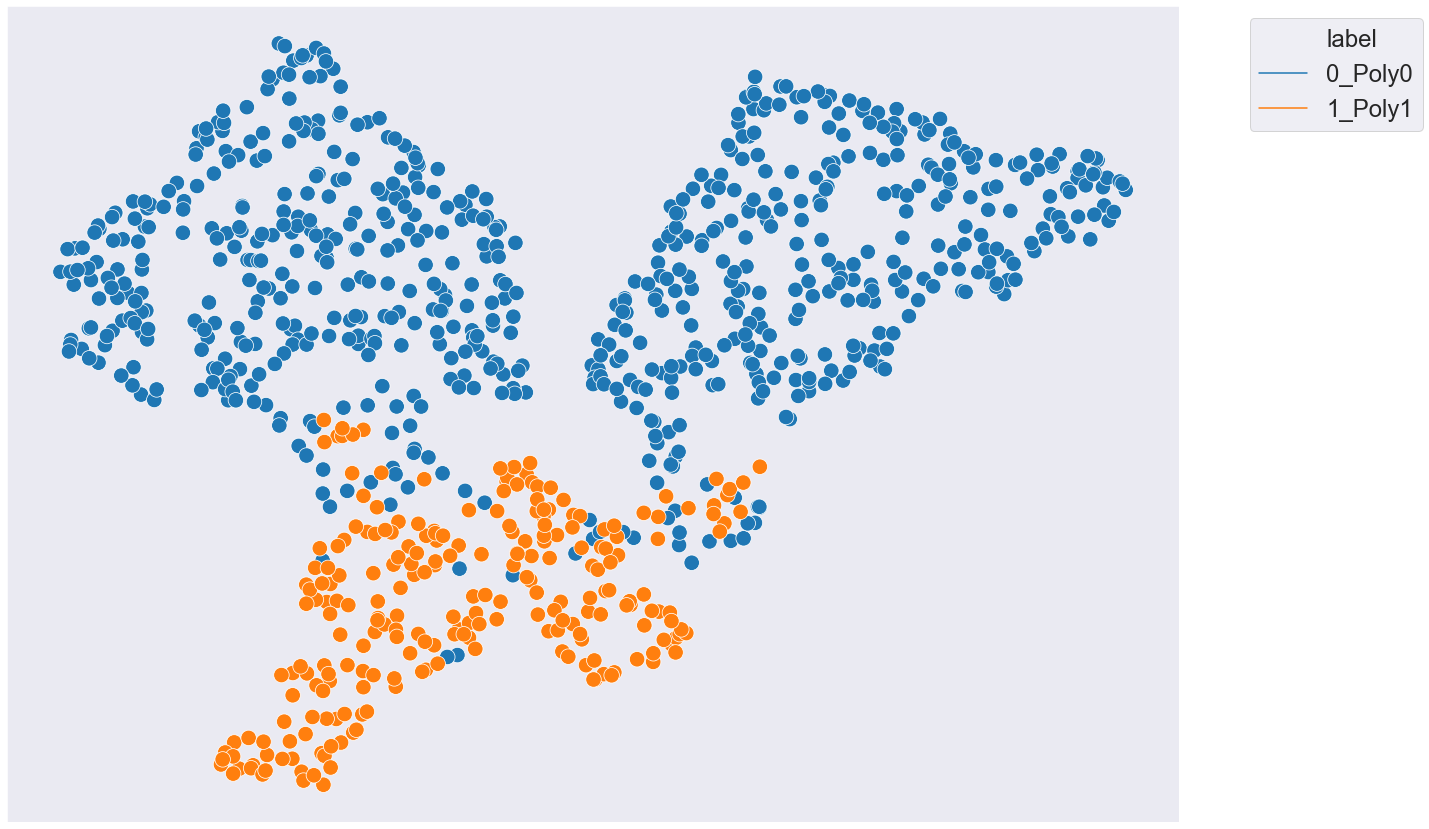

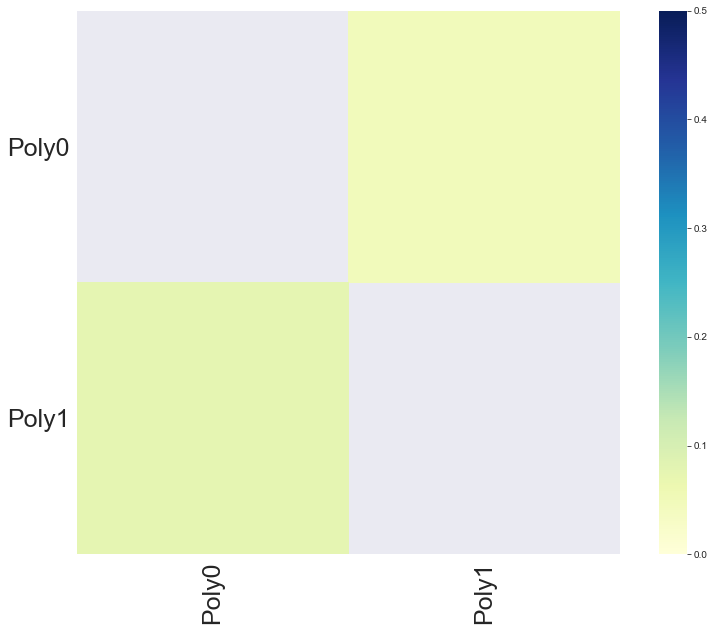

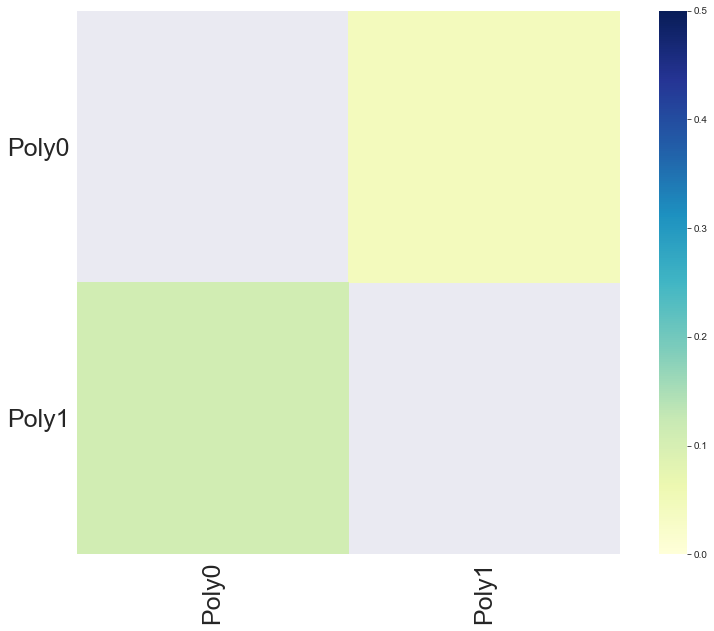

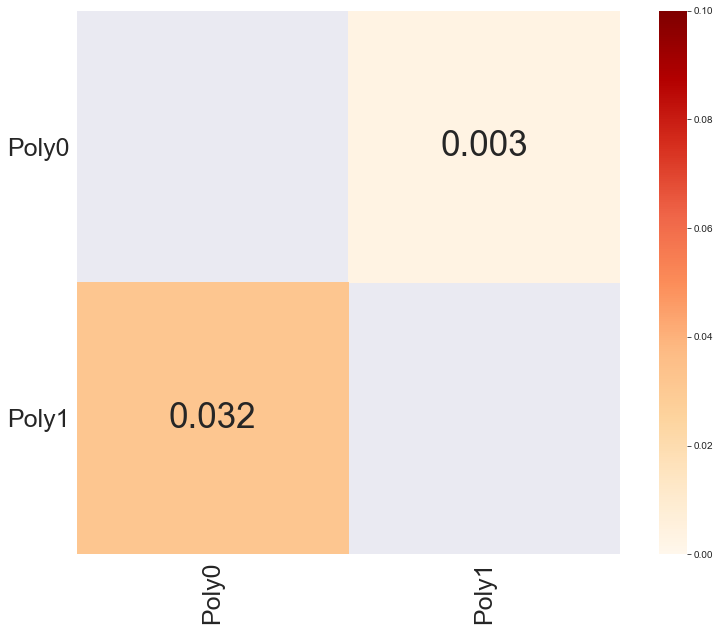

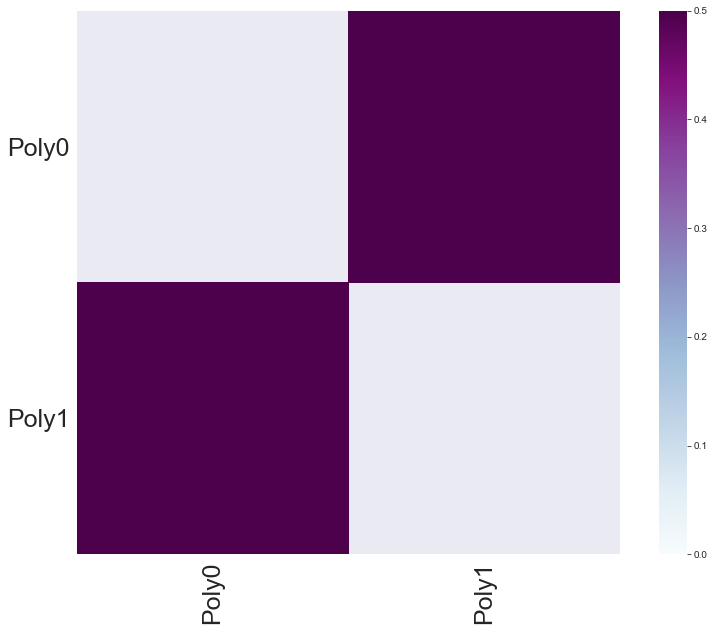

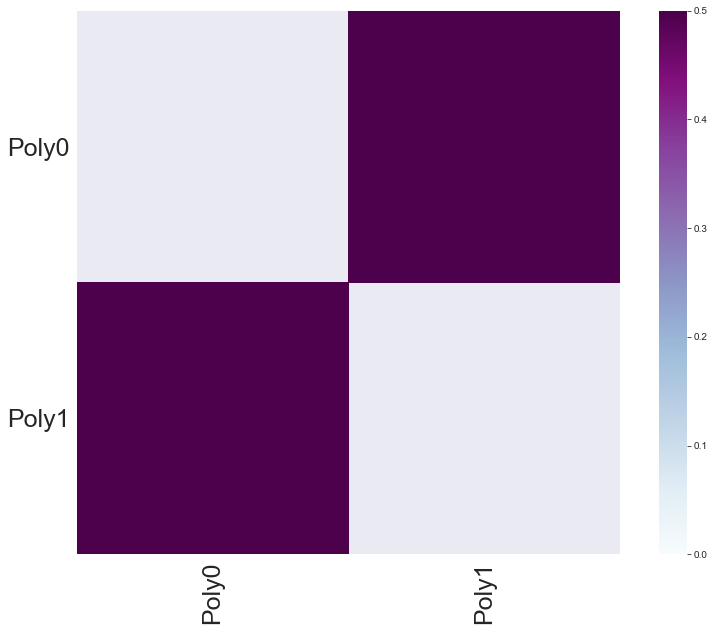

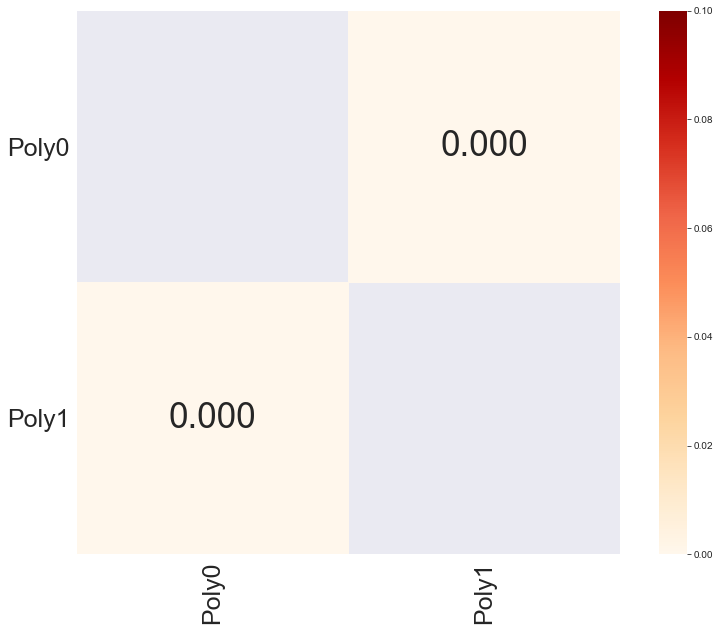

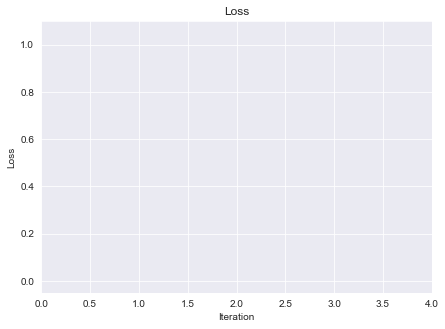

In [11]:
umap_cp_low_dim = umap_cp.fit_transform(X, y)

## UMAP with Blobs

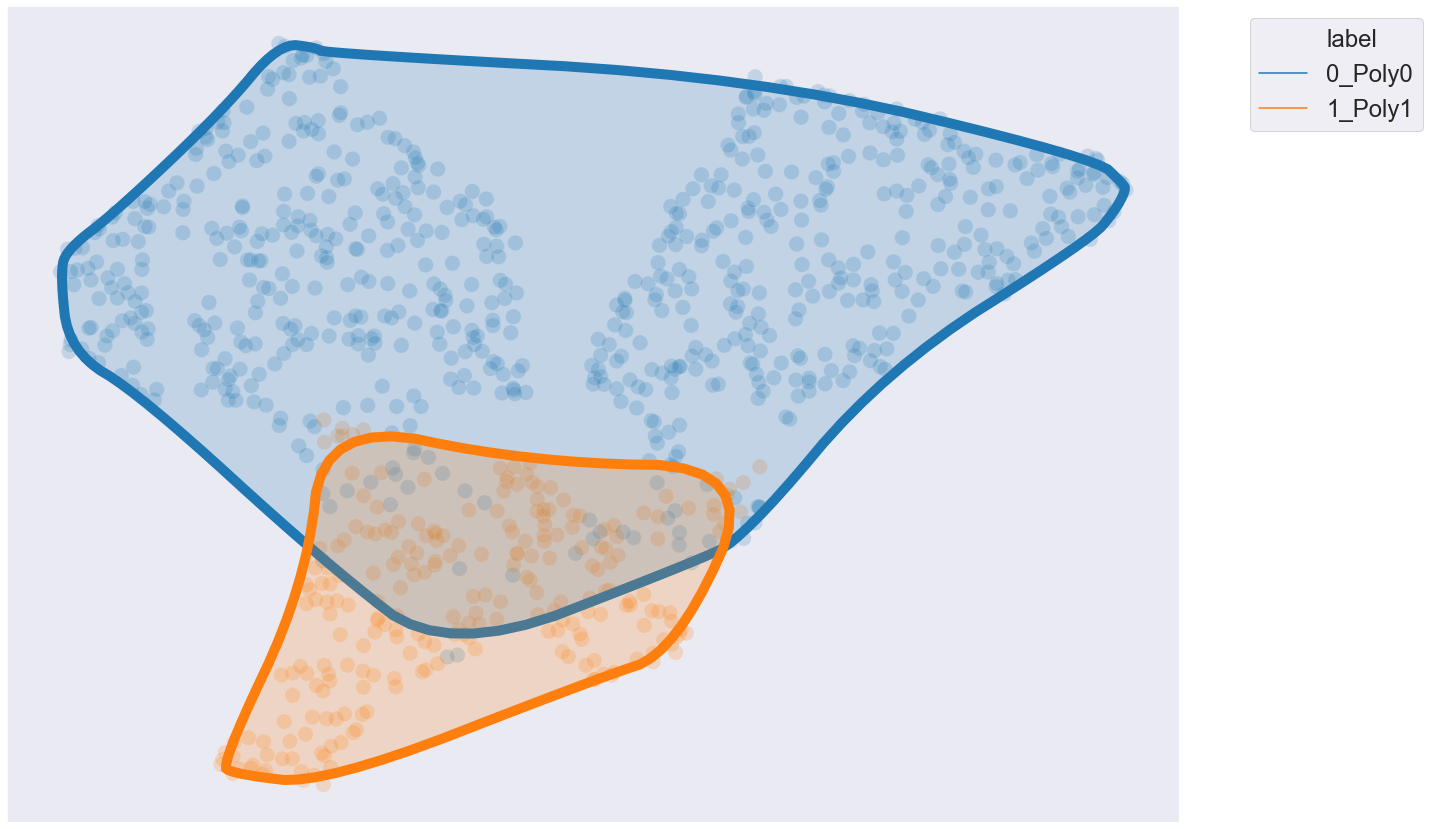

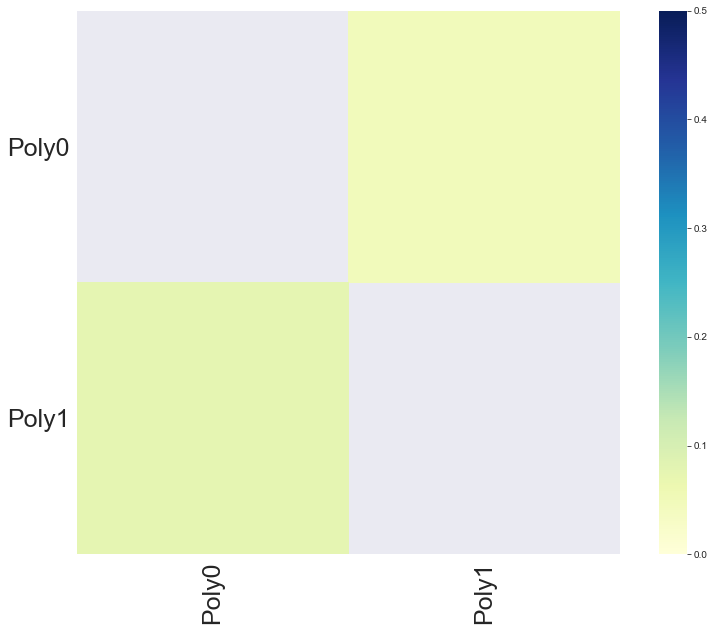

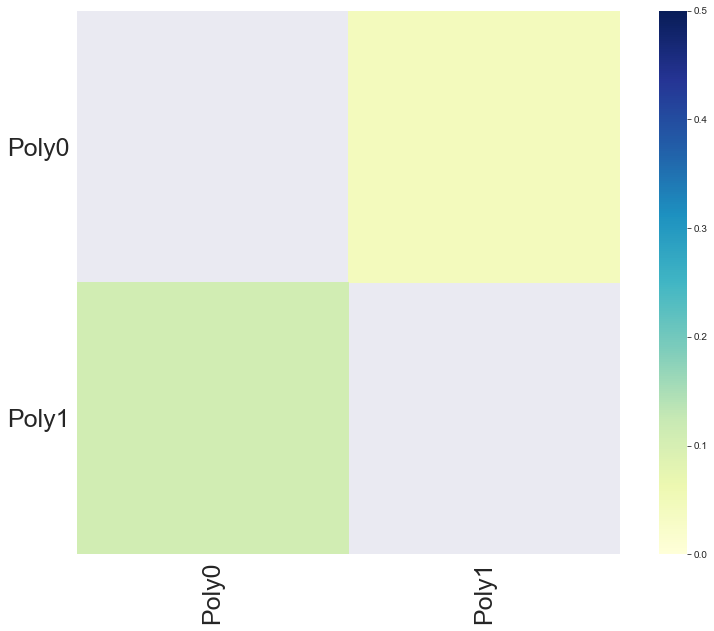

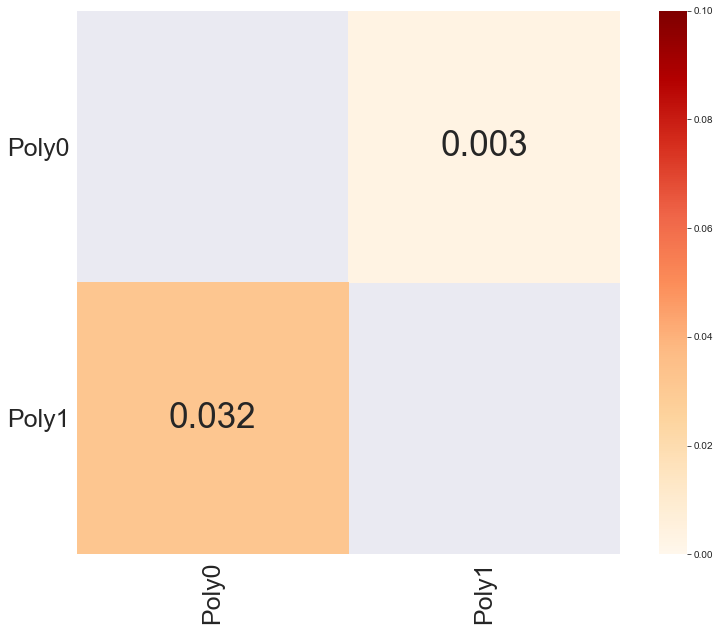

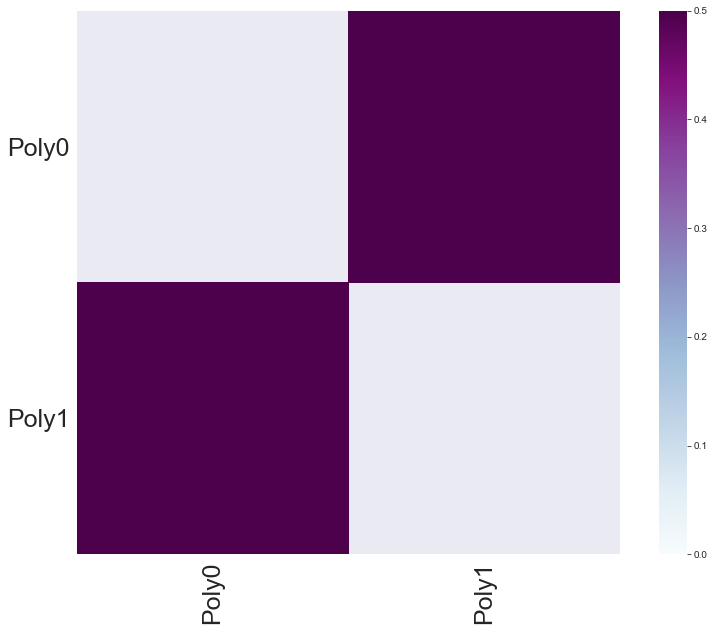

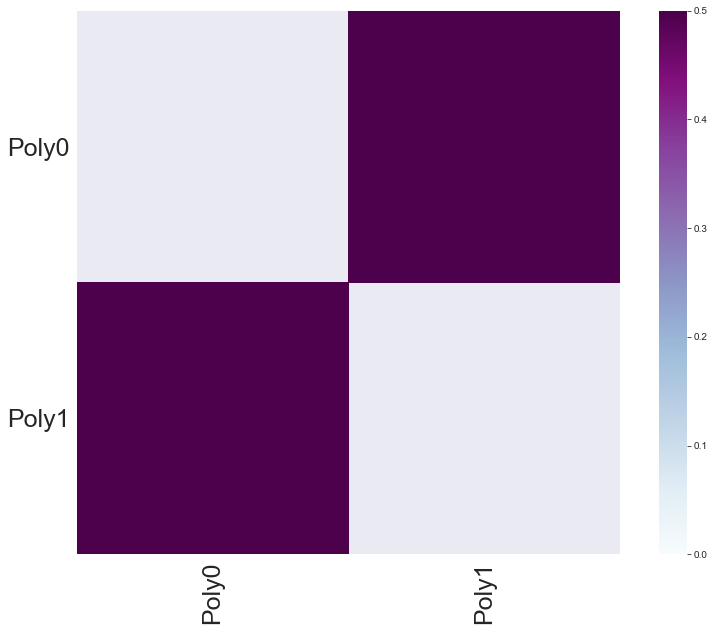

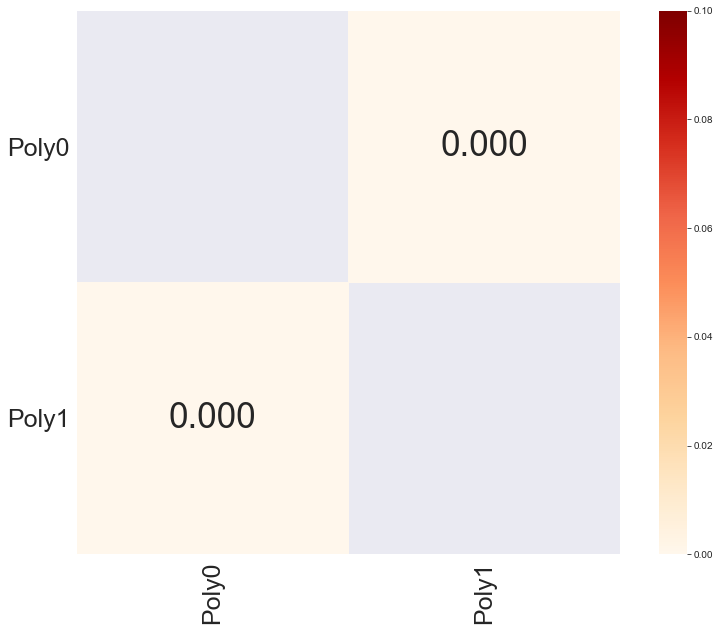

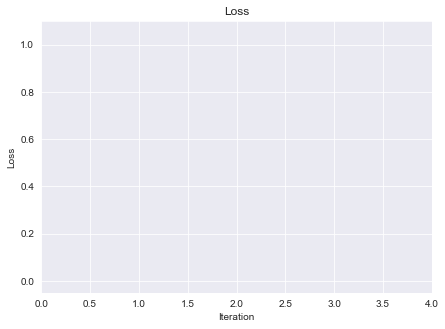

In [13]:
umap_cp.show_blobs=True
umap_cp.alpha = [0.1, 0.1]
umap_cp.douglas_peucker_tolerance = 0.1
umap_cp.remove_outliers_k = None
umap_cp.anchors_plot_sns_separate(1, True)

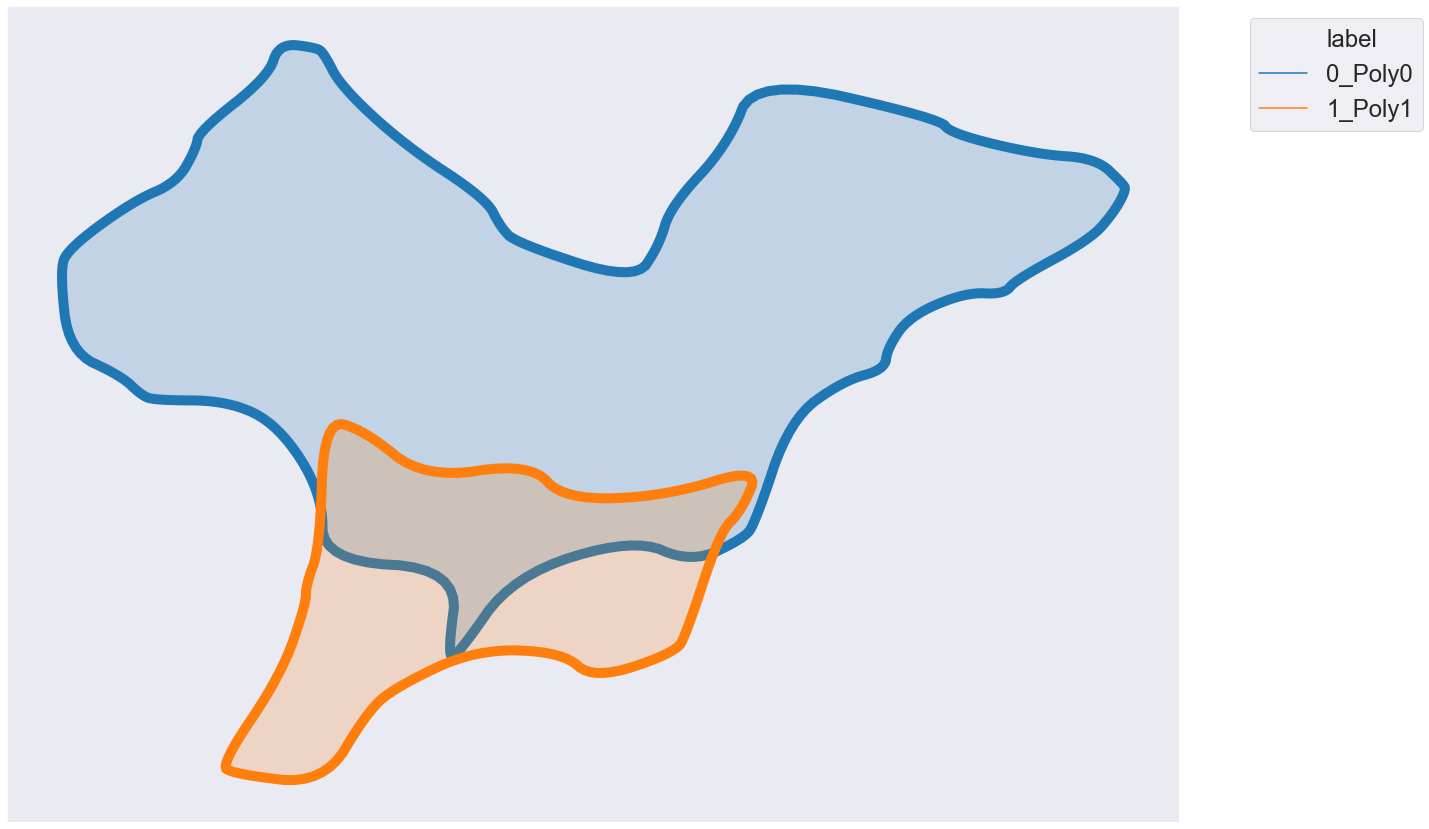

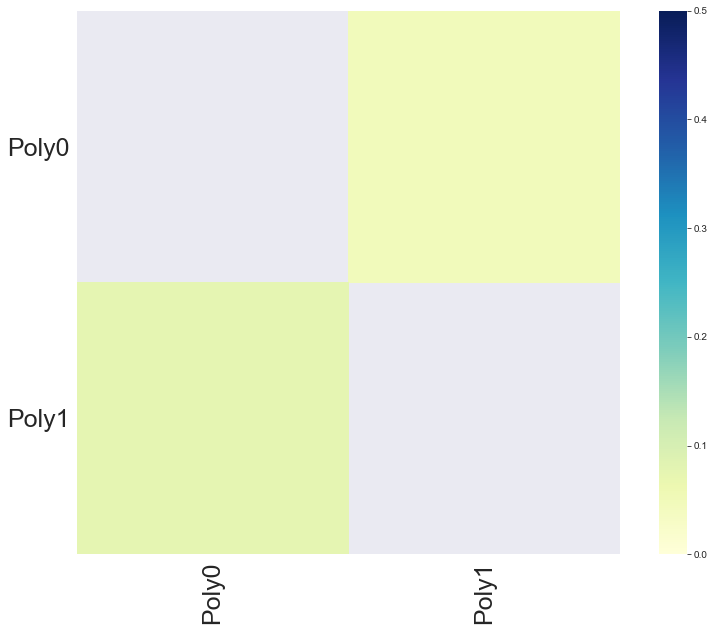

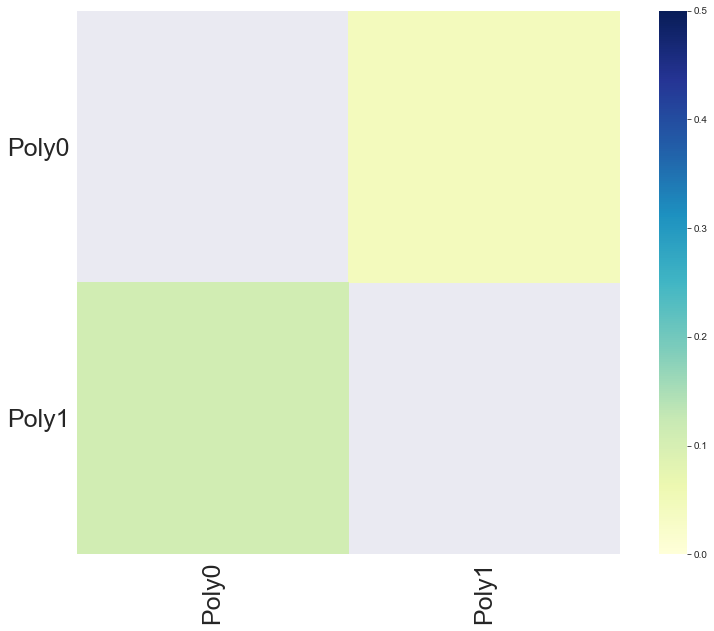

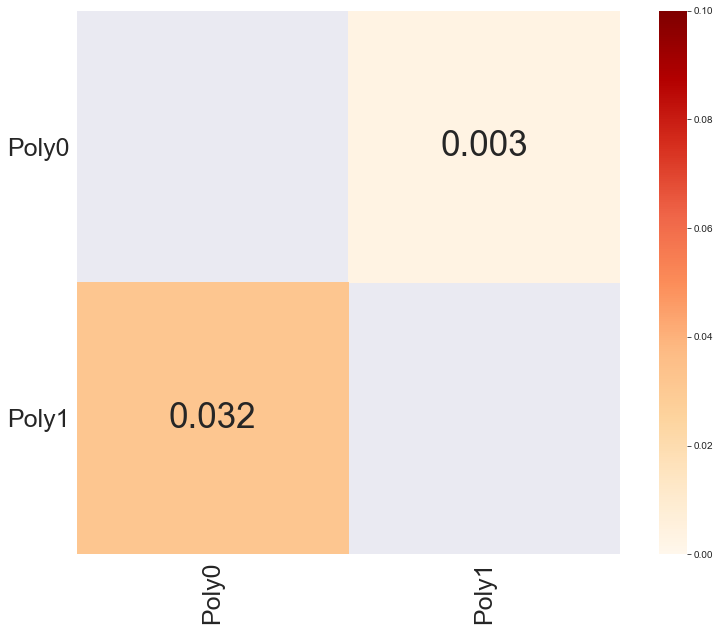

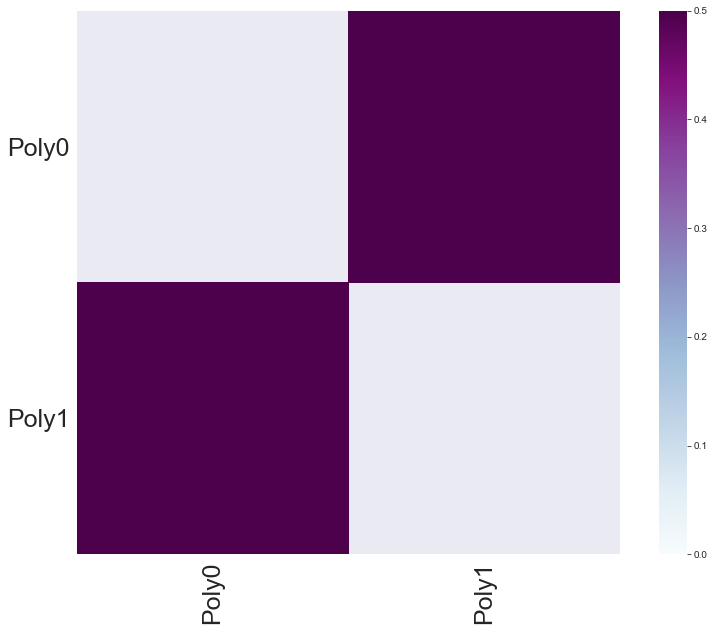

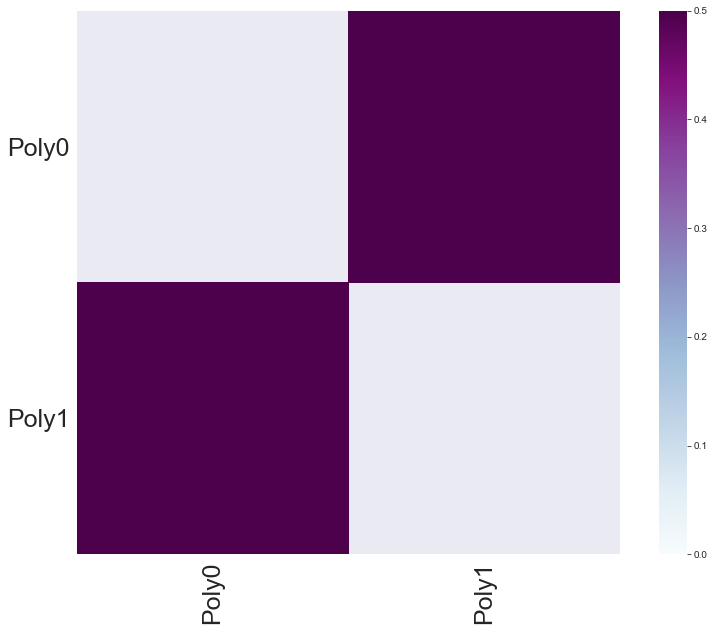

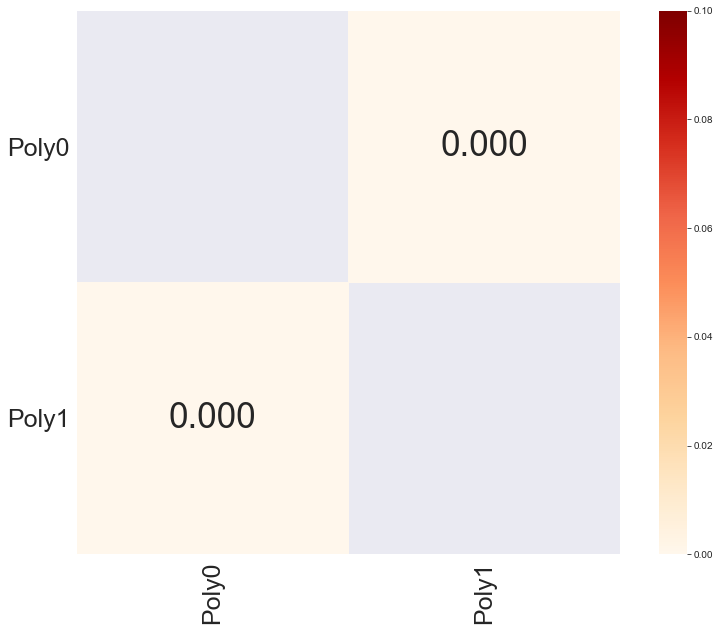

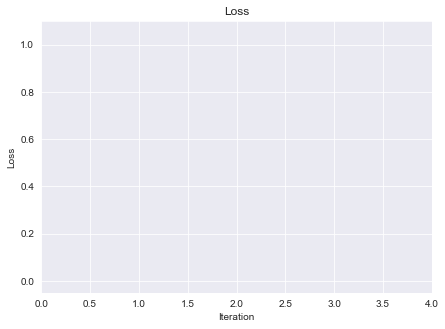

In [15]:
umap_cp.show_blobs=True
umap_cp.alpha = [0.5, 0.5]
umap_cp.douglas_peucker_tolerance = 0.1
umap_cp.remove_outliers_k = None
umap_cp.show_points = False
umap_cp.anchors_plot_sns_separate(1, True)

# PCA

In [14]:
pca_cp = ClusterPlot(dim_reduction_algo='pca',
            reduce_all_points=True,
            n_iter=1, 
            batch_size=0,
            learning_rate=0.1,
            do_animation=False,
            dataset='Hourglass2',
            class_to_label=ds.class_to_label,
            show_fig=True,
            save_fig=True,
            random_state=RANDOM_STATE,
            show_anchors=False,
            supervised=False,
            show_points=True,
            show_inner_blobs=False,
            show_blobs=False,
            show_label_level_plots=True,
            show_anchor_level_plot=False,
            annotate_images=False,
            birch_threshold=0.55,)
print(pca_cp)

AMAP
addr:@8b5d88
verbose=True
n_components=2
anchors_method='birch'
n_intra_anchors=None
birch_threshold=0.55
birch_branching_factor=None
dim_reduction_algo='pca'
supervised=False
umap_n_neighbors=15
umap_min_dist=1
reduce_all_points=True
uniform_points_per='anchor'
k=20
proximity_k=3
self_relation=False
radius_q=None
do_relaxation=True
top_greedy=1
magnitude_step=False
n_iter=1
batch_size=0
stop_criteria=1e-05
loss_func=<function AMAP.l_inf_loss at 0x0000027BA8C838B8>
loss='Linf'
only_inter_relations=False
learning_rate=0.1
random_points_method='voronoi'
class_to_label={0: 'Poly0', 1: 'Poly1'}
random_state=42
n_jobs=None
dataset='Hourglass2'
show_fig=True
save_fig=True
is_plotly=False
do_animation=False
use_spline=False
alpha=None
douglas_peucker_tolerance=0.6
smooth_iter=13
show_relations=False
save_fig_every=1
show_points=True
show_anchors=False
show_polygons=False
show_inner_blobs=False
alpha_voronoi=False
show_label_level_plots=True
show_anchor_level_plot=False
main_plot_fig_size

finding intra class anchors using birch
UnSupervised Dim Reduction
Dim Reduction all points
Starting iteration 1 loss = 0.029138166894664835


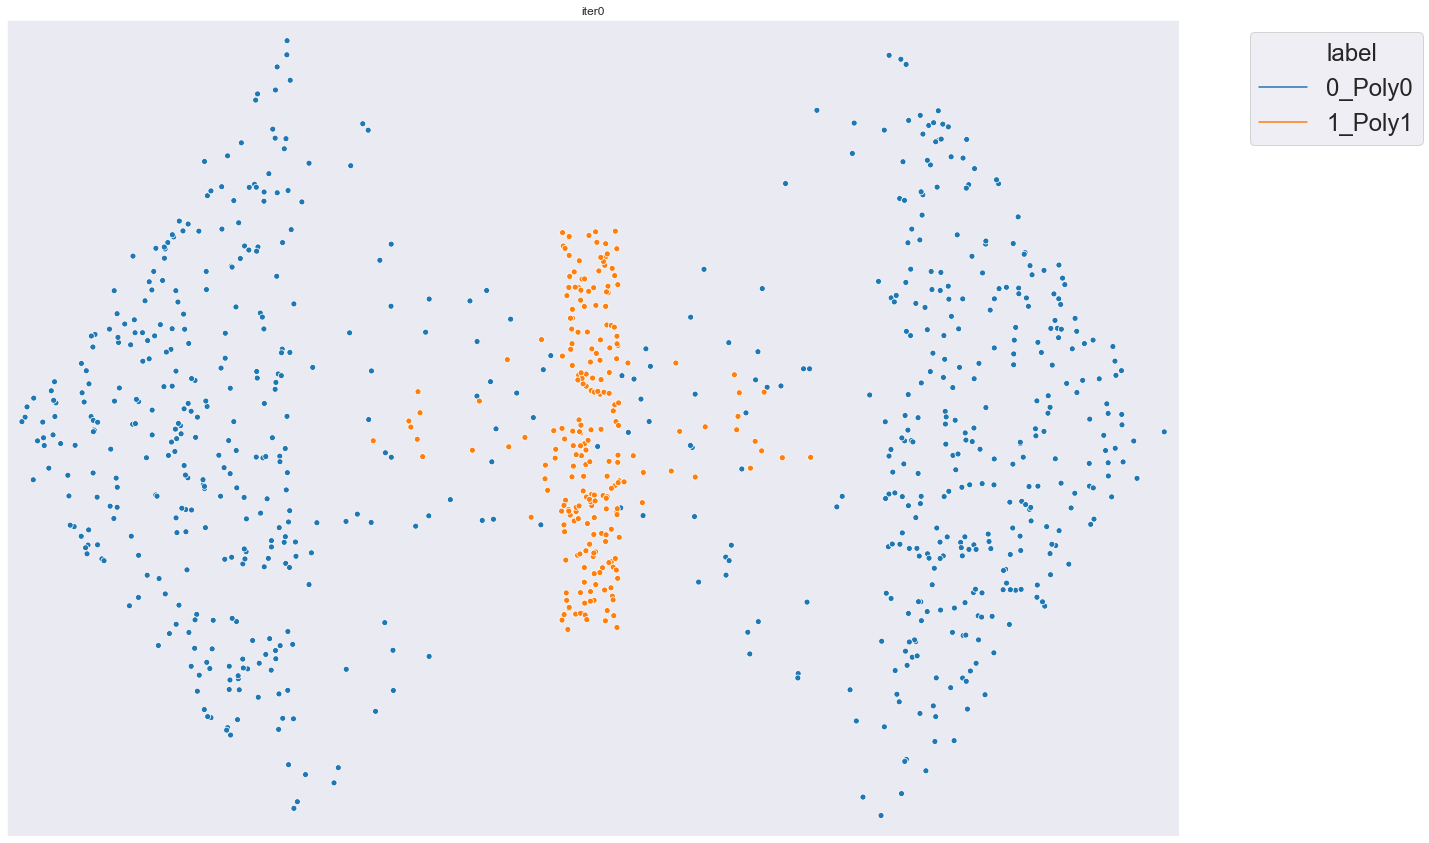

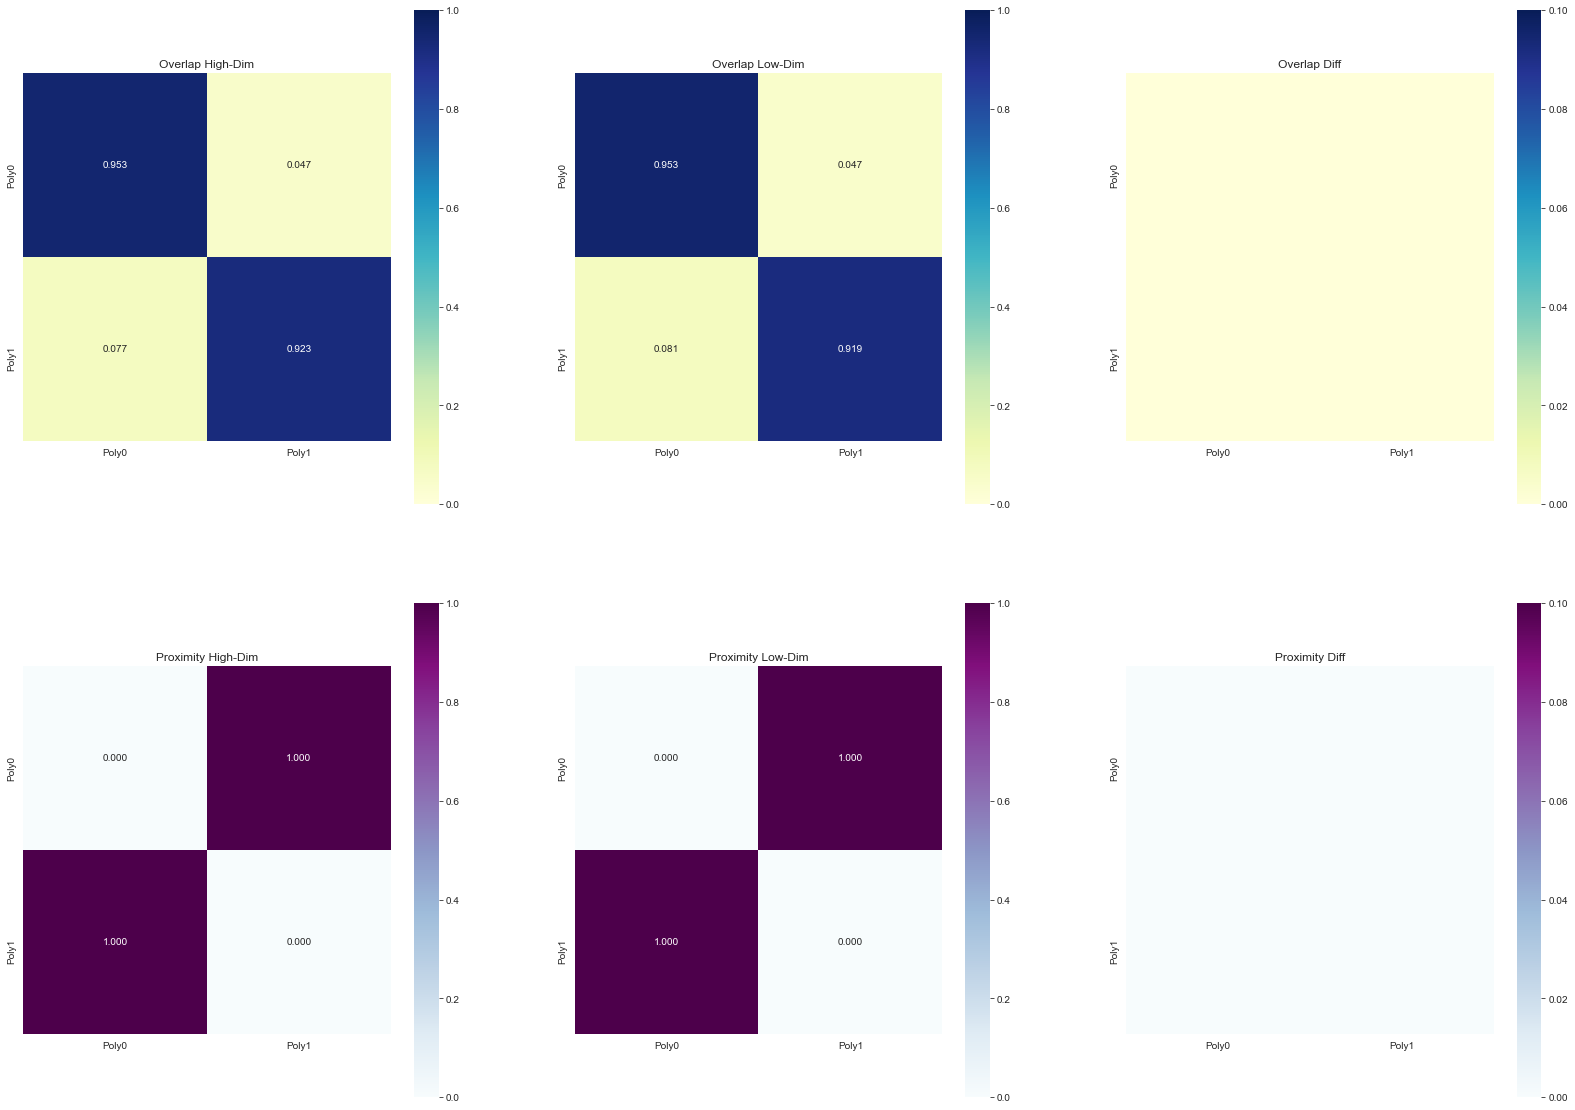

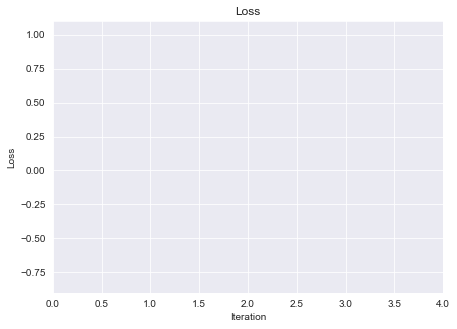

In [15]:
low_dim_pca = pca_cp.fit_transform(X, y)

# BIRCH and UMAP

In [9]:
birch_umap_cp = ClusterPlot(reduce_all_points=False,
                  n_iter=1, 
                  batch_size=0,
                  learning_rate=0.1,
                  dataset='Hourglass2',
                  class_to_label=ds.class_to_label,
                  show_fig=True,
                  save_fig=True,
                  random_state=RANDOM_STATE,
                  show_anchors=True,
                  supervised=False,
                  show_points=False,
                  show_inner_blobs=False,
                  show_blobs=False,
                  show_label_level_plots=True,
                  show_anchor_level_plot=False,
                  save_fig_every=25,
                  annotate_images=False,
                  birch_threshold=0.42,
                  alpha=0.8,
                  douglas_peucker_tolerance=0.3,
                  smooth_iter=3,
                  magnitude_step=False)
print(birch_umap_cp)

AMAP
addr:@b65048
verbose=True
n_components=2
anchors_method='birch'
n_intra_anchors=None
birch_threshold=0.42
birch_branching_factor=None
dim_reduction_algo='umap'
supervised=False
umap_n_neighbors=15
umap_min_dist=1
reduce_all_points=False
uniform_points_per='anchor'
k=20
proximity_k=3
self_relation=False
radius_q=None
do_relaxation=True
top_greedy=1
magnitude_step=False
n_iter=1
batch_size=0
stop_criteria=1e-05
loss_func=<function AMAP.l_inf_loss at 0x0000022E95E2F3A8>
loss='Linf'
only_inter_relations=False
learning_rate=0.1
mask_sparse_subcluster=None
random_points_method='voronoi'
class_to_label={0: 'Poly0', 1: 'Poly1'}
random_state=42
n_jobs=None
dataset='Hourglass2'
show_fig=True
save_fig=True
is_plotly=False
do_animation=False
use_spline=False
alpha=0.8
douglas_peucker_tolerance=0.3
smooth_iter=3
skip_polygons_with_area=0.01
show_relations=False
mask_relation_in_same_label=False
save_fig_every=25
show_points=False
show_anchors=True
show_polygons=False
show_inner_blobs=False
alp

finding intra class anchors using birch
UnSupervised Dim Reduction
Dim Reduction only anchors


  0%|                                                                                          | 0/966 [00:00<?, ?it/s]

Dim Reduction only anchors - generate random points in low dim per anchor


100%|███████████████████████████████████████████████████████████████████████████████| 966/966 [00:06<00:00, 154.25it/s]


Starting iteration 1 loss = 0.984550226676211


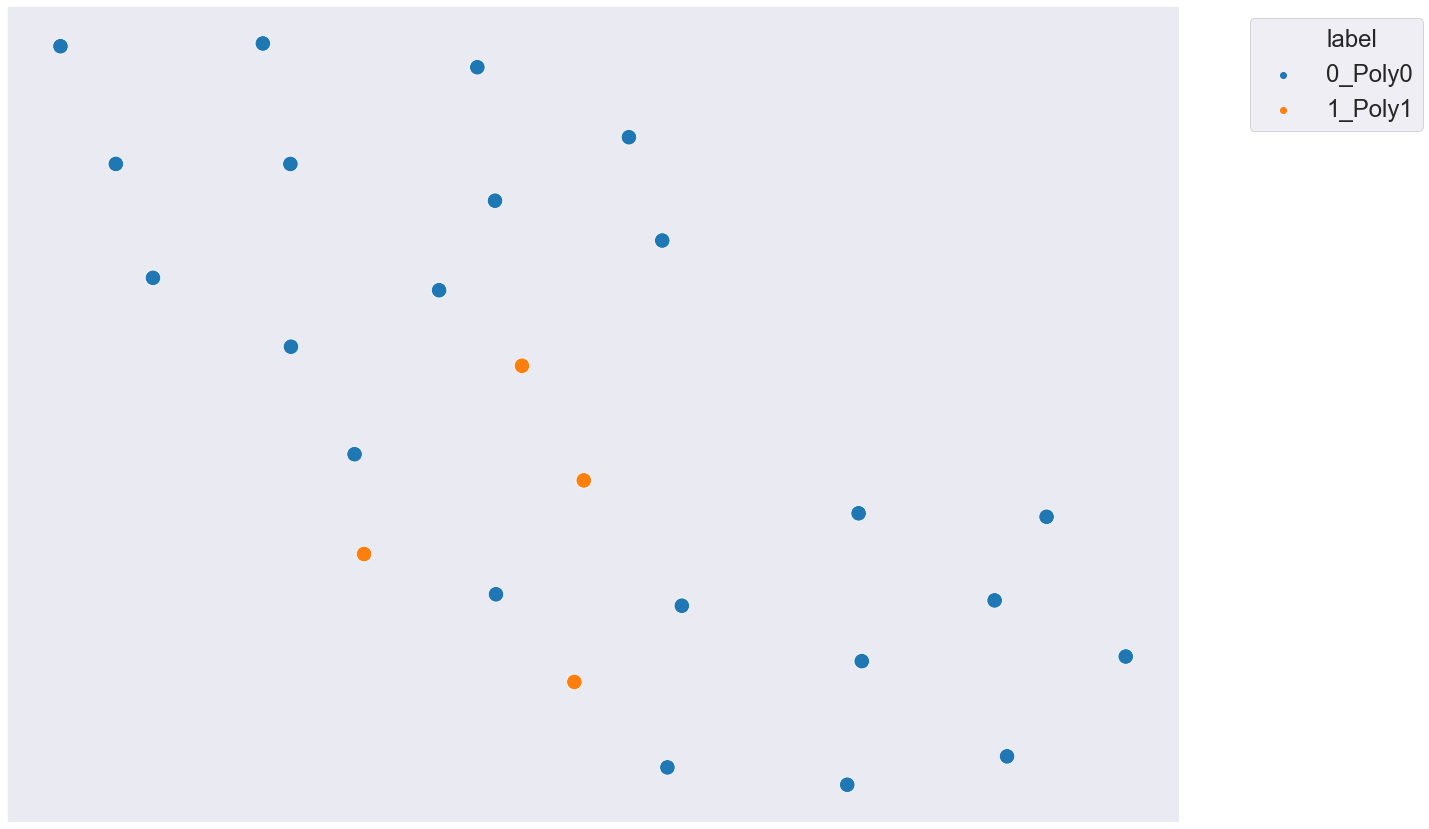

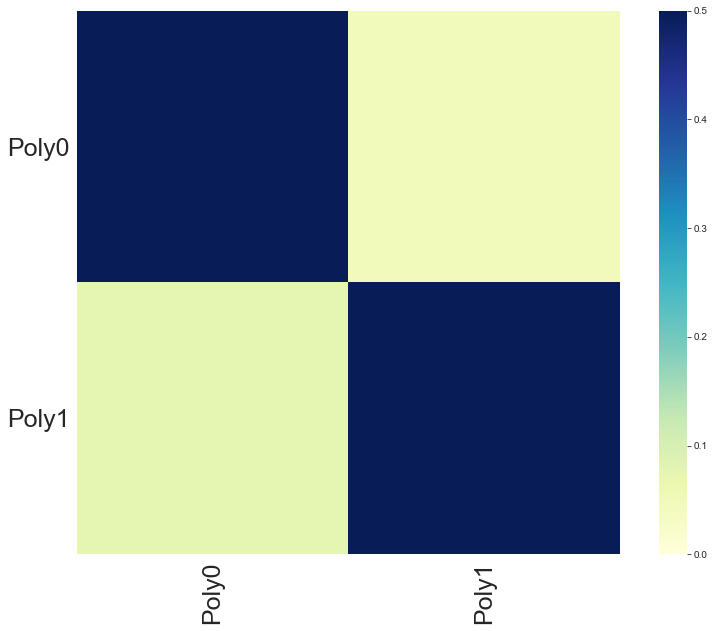

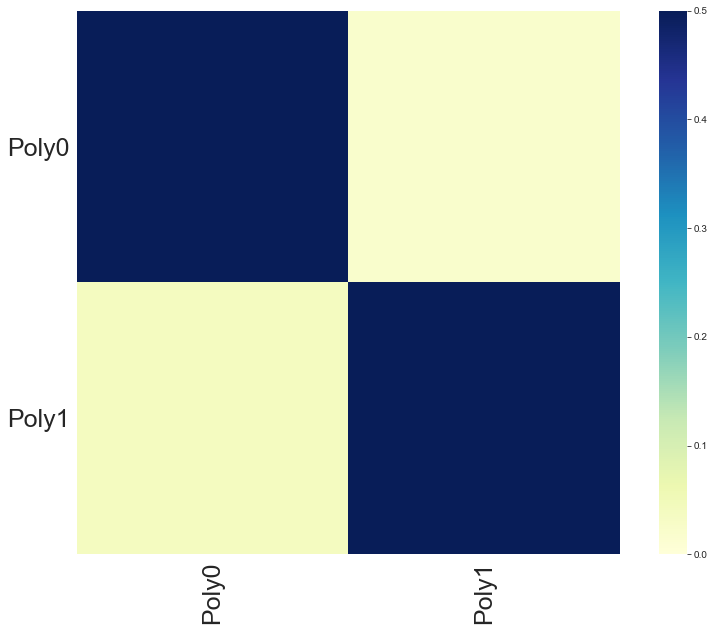

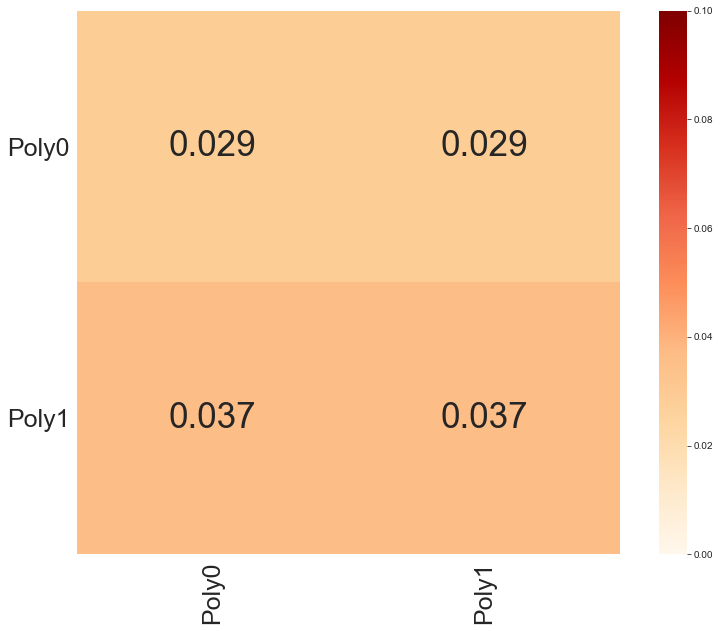

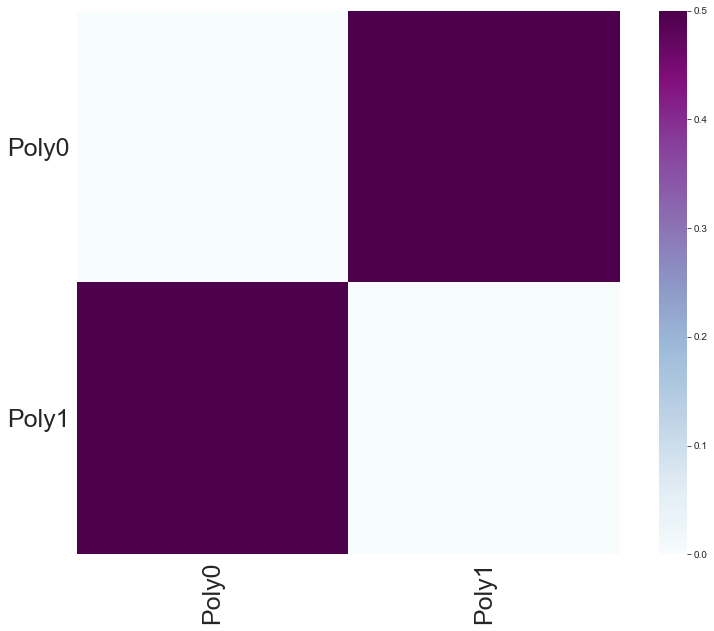

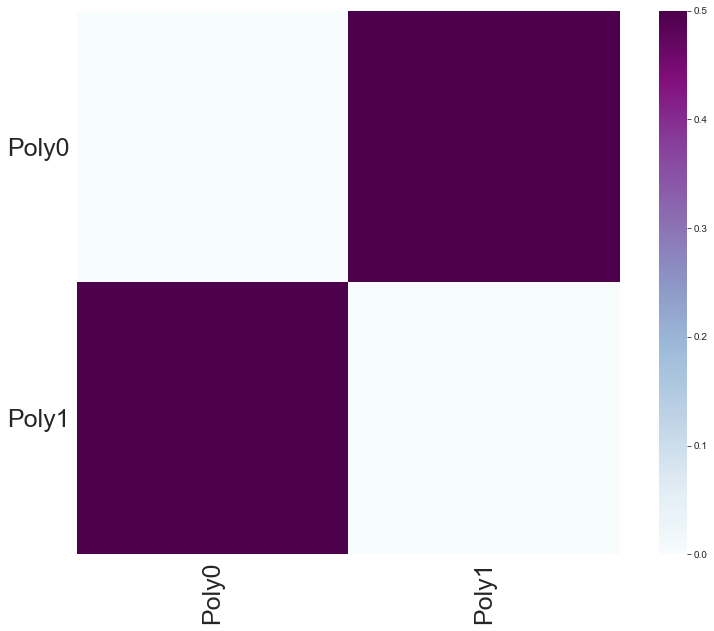

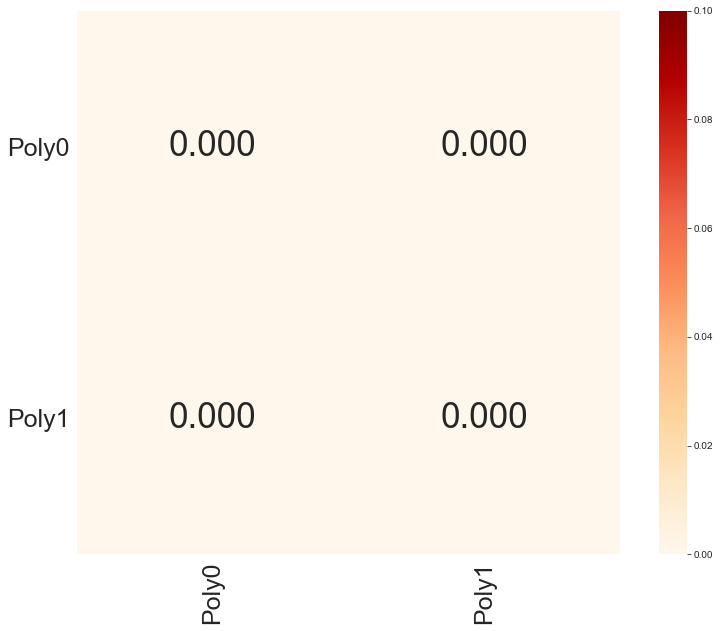

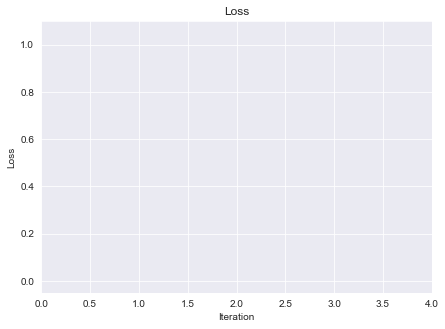

In [10]:
birch_umap_low_dim = birch_umap_cp.fit_transform(X, y)

# Cluster Plots

In [4]:
blobs_cp = ClusterPlot(reduce_all_points=False,
                  n_iter=1, 
                  batch_size=0,
                  learning_rate=0.1,
                  dataset='Hourglass2',
                  class_to_label=ds.class_to_label,
                  show_fig=True,
                  save_fig=True,
                  random_state=RANDOM_STATE,
                  show_anchors=False,
                  supervised=False,
                  show_points=False,
                  show_inner_blobs=True,
                  show_blobs=True,
                  show_label_level_plots=True,
                  show_anchor_level_plot=False,
                  save_fig_every=25,
                  annotate_images=False,
                  birch_threshold=0.42,
                  alpha=0.8,
                  douglas_peucker_tolerance=0.3,
                  smooth_iter=3,
                  magnitude_step=False)
print(blobs_cp)

ClusterPlot
addr:@2106d8
verbose=20
logger=<Logger ClusterPlot-18645 (INFO)>
n_components=2
anchors_method='birch'
n_intra_anchors=None
birch_threshold=0.42
birch_branching_factor=None
dim_reduction_algo='umap'
supervised=False
umap_n_neighbors=15
umap_min_dist=1
tsne_perplexity=30.0
reduce_all_points=False
uniform_points_per='anchor'
k=20
proximity_k=3
self_relation=False
radius_q=None
do_relaxation=True
top_greedy=1
magnitude_step=False
n_iter=1
batch_size=0
stop_criteria=1e-05
loss_func=<function ClusterPlot._l_inf_loss at 0x00000201AB069510>
loss='Linf'
only_inter_relations=False
learning_rate=0.1
mask_sparse_subcluster=None
random_points_method='voronoi'
class_to_label={0: 'Poly0', 1: 'Poly1'}
random_state=42
n_jobs=None
dataset='Hourglass2'
show_fig=True
save_fig=True
figsize=(21, 15)
do_animation=False
use_spline=False
alpha=0.8
remove_outliers_k=None
douglas_peucker_tolerance=0.3
smooth_iter=3
skip_polygons_with_area=0.01
mask_relation_in_same_label=True
save_fig_every=25
show_

In [5]:
low_dim_blobs_cp = blobs_cp.fit_transform(X, y)

NameError: name 'X' is not defined

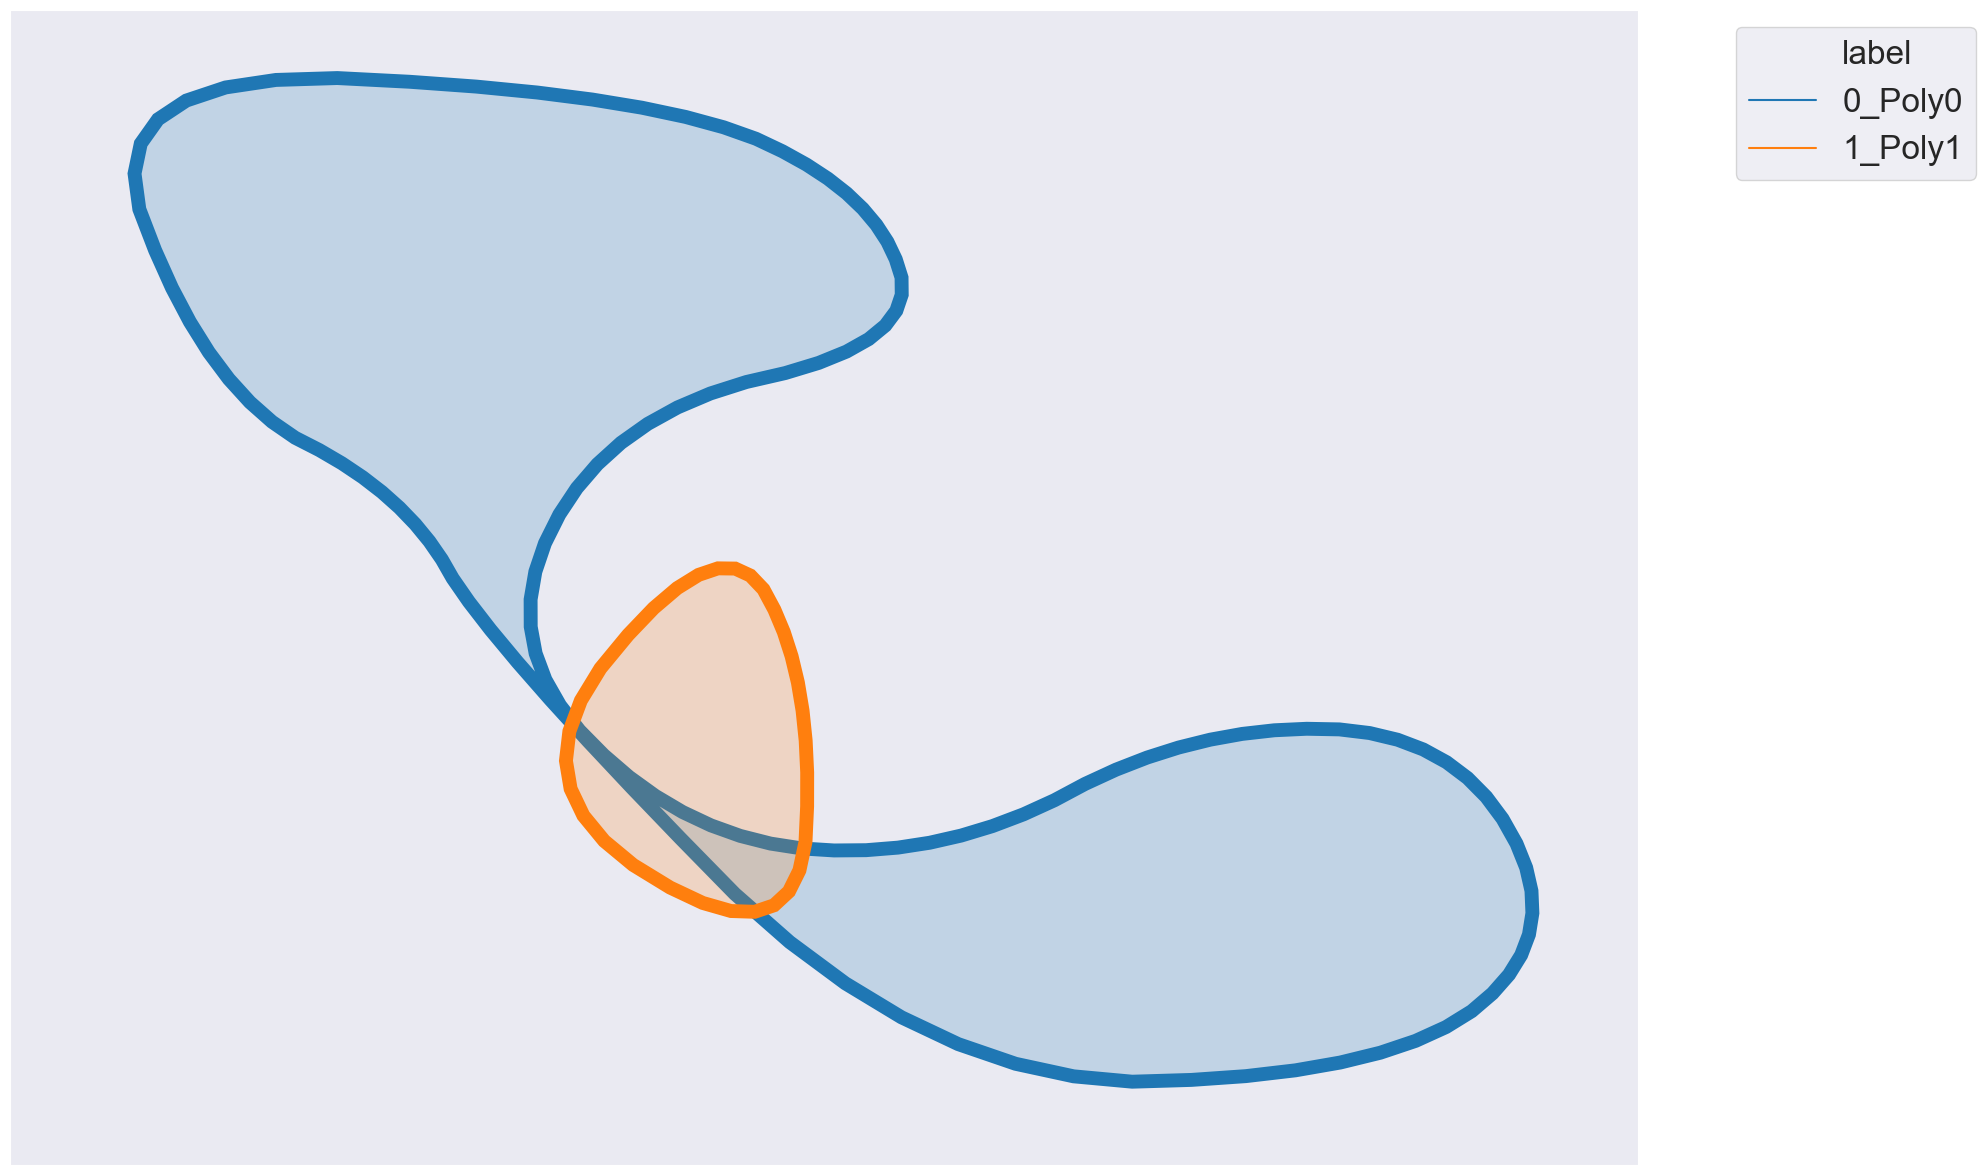

In [7]:
blobs_cp.cluster_plot(show_label_level_plots=False, show_loss_plot=False, show_inner_blobs=False)